# Percent Body Fat 
Building models, running computations, analyzing data, and answering questions about the UCI Body Fat dataset.

In [3]:
import math
import sys

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

In [ ]:

bf = pd.read_csv('https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/560_bodyfat/560_bodyfat.tsv.gz', sep='\t')
bf

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,target
0,1.0708,23.0,154.25,67.75,36.200001,93.099998,85.199997,94.500000,59.000000,37.299999,21.900000,32.000000,27.400000,17.100000,12.300000
1,1.0853,22.0,173.25,72.25,38.500000,93.599998,83.000000,98.699997,58.700001,37.299999,23.400000,30.500000,28.900000,18.200001,6.100000
2,1.0414,22.0,154.00,66.25,34.000000,95.800003,87.900002,99.199997,59.599998,38.900002,24.000000,28.799999,25.200001,16.600000,25.299999
3,1.0751,26.0,184.75,72.25,37.400002,101.800003,86.400002,101.199997,60.099998,37.299999,22.799999,32.400002,29.400000,18.200001,10.400000
4,1.0340,24.0,184.25,71.25,34.400002,97.300003,100.000000,101.900002,63.200001,42.200001,24.000000,32.200001,27.700001,17.700001,28.700001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,70.0,134.25,67.00,34.900002,89.199997,83.599998,88.800003,49.599998,34.799999,21.500000,25.600000,25.700001,18.500000,11.000000
248,1.0236,72.0,201.00,69.75,40.900002,108.500000,105.000000,104.500000,59.599998,40.799999,23.200001,35.200001,28.600000,20.100000,33.599998
249,1.0328,72.0,186.75,66.00,38.900002,111.099998,111.500000,101.699997,60.299999,37.299999,21.500000,31.299999,27.200001,18.000000,29.299999
250,1.0399,72.0,190.75,70.50,38.900002,108.300003,101.300003,97.800003,56.000000,41.599998,22.700001,30.500000,29.400000,19.799999,26.000000


### Dataset Description

In [ ]:

cols = bf.columns[:10]
others = bf.columns[10:]
print(list(cols), list(others))

['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee'] ['Ankle', 'Biceps', 'Forearm', 'Wrist', 'target']


All columns are continuous and describe 252 men's measurements.

Density: the man's body density in gm/cm^3, measured via underwater weighing. 

Age: the man's age.

Weight: the man's weight in pounds.

Height: the man's height in inches.

The other non-target columns measure the circumference in centimeters of various body parts i.e. of their chest, abdomen, hip, thigh, and knee.

Target: the man's percent of body fat.

### Exploratory Analysis of the Data Set

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,target
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,44.884921,178.924405,70.148810,37.992064,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762,19.150794
std,0.019031,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411804,1.694894,3.021274,2.020691,0.933585,8.368740
min,0.995000,22.000000,118.500000,29.500000,31.100000,79.300003,69.400002,85.000000,47.200001,33.000000,19.100000,24.799999,21.000000,15.800000,0.000000
25%,1.041400,35.750000,159.000000,68.250000,36.400002,94.350000,84.574999,95.500000,56.000000,36.975000,22.000000,30.200001,27.299999,17.600000,12.475000
50%,1.054900,43.000000,176.500000,70.000000,38.000000,99.649998,90.950001,99.300003,59.000000,38.500000,22.799999,32.049999,28.700001,18.299999,19.200001
75%,1.070400,54.000000,197.000000,72.250000,39.425001,105.375002,99.324997,103.525000,62.349999,39.925001,24.000000,34.325000,30.000000,18.799999,25.299999
max,1.108900,81.000000,363.149994,77.750000,51.200001,136.199997,148.100006,147.699997,87.300003,49.099998,33.900002,45.000000,34.900002,21.400000,47.500000


C:\Users\romus\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


array([[<Axes: title={'center': 'Density'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Neck'}>,
        <Axes: title={'center': 'Chest'}>,
        <Axes: title={'center': 'Abdomen'}>,
        <Axes: title={'center': 'Hip'}>],
       [<Axes: title={'center': 'Thigh'}>,
        <Axes: title={'center': 'Knee'}>,
        <Axes: title={'center': 'Ankle'}>,
        <Axes: title={'center': 'Biceps'}>],
       [<Axes: title={'center': 'Forearm'}>,
        <Axes: title={'center': 'Wrist'}>,
        <Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

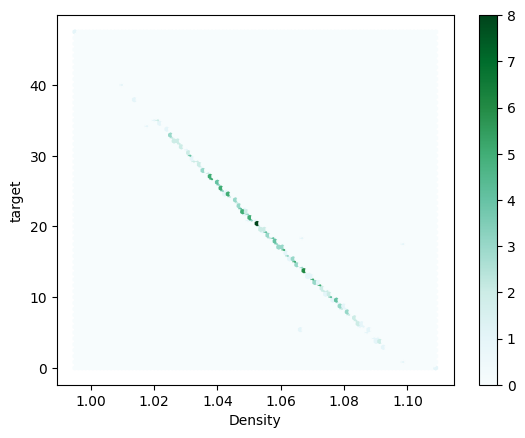

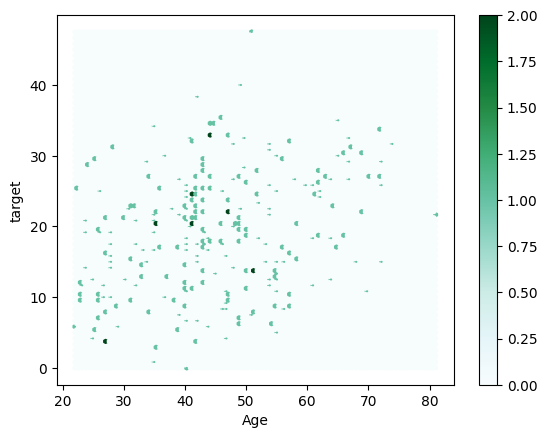

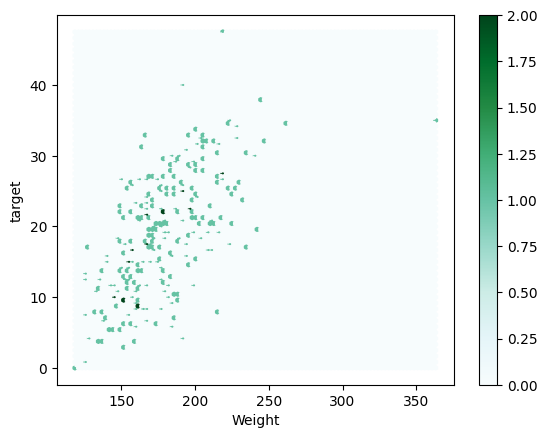

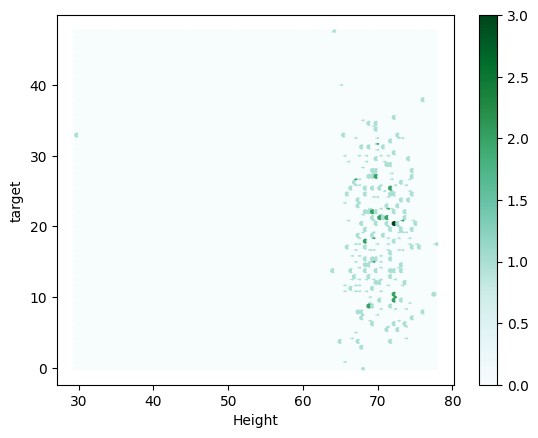

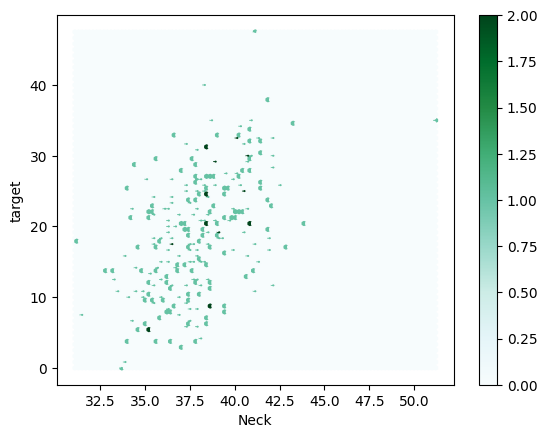

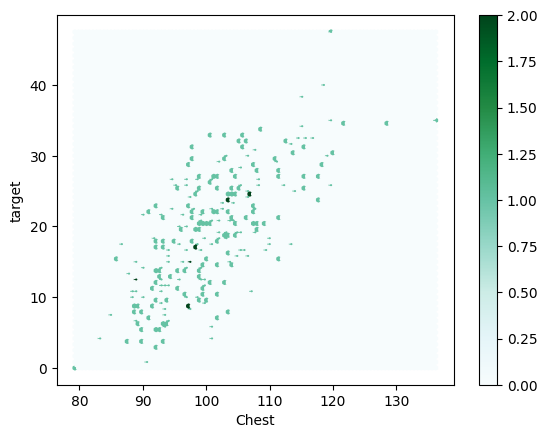

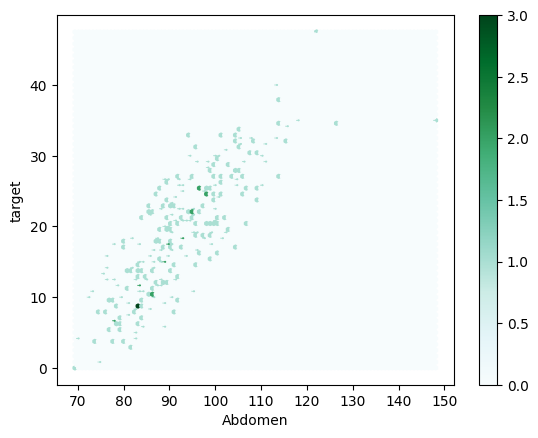

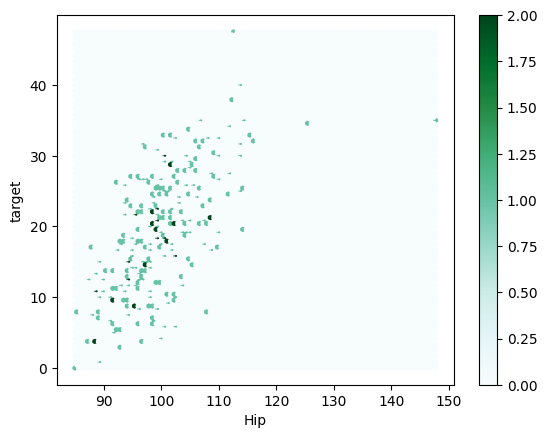

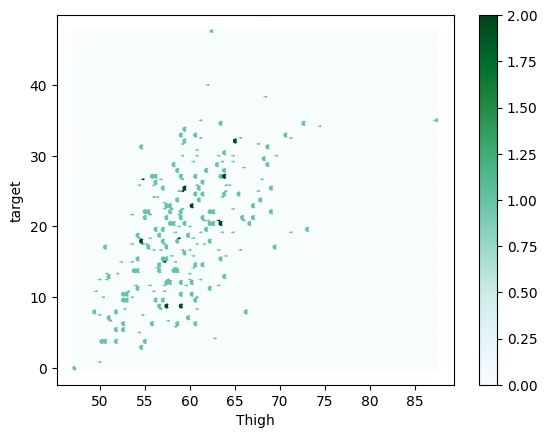

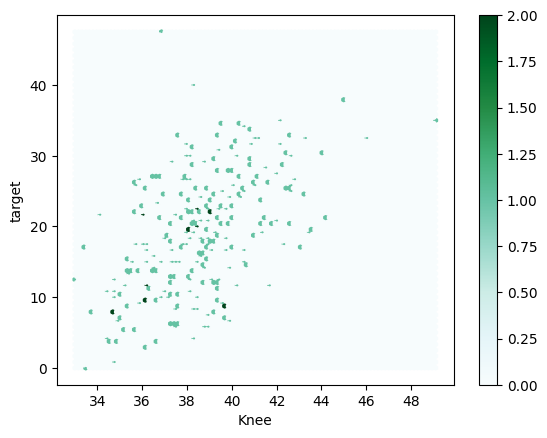

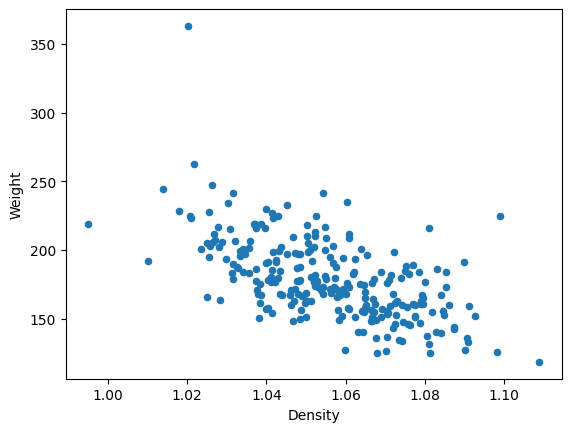

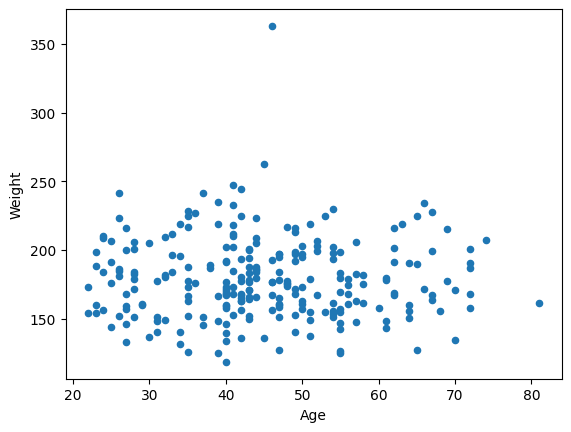

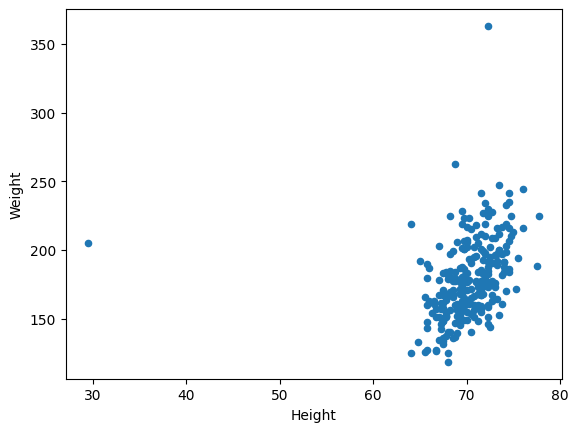

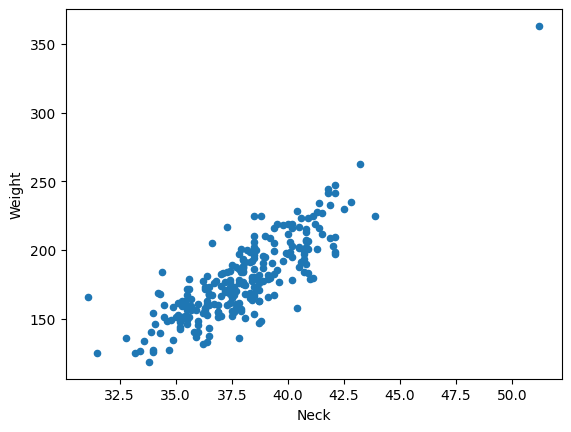

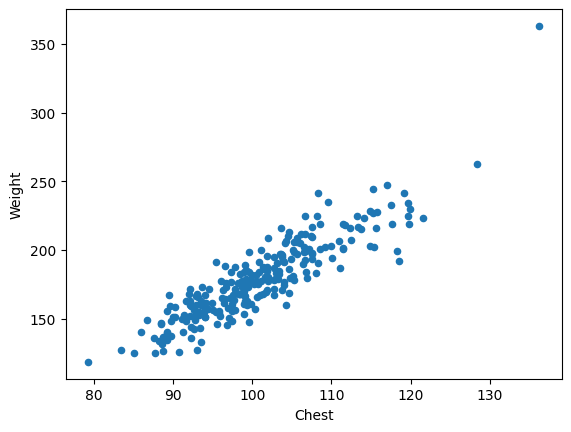

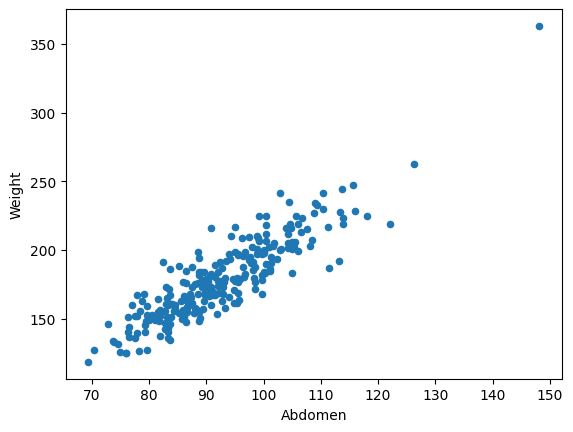

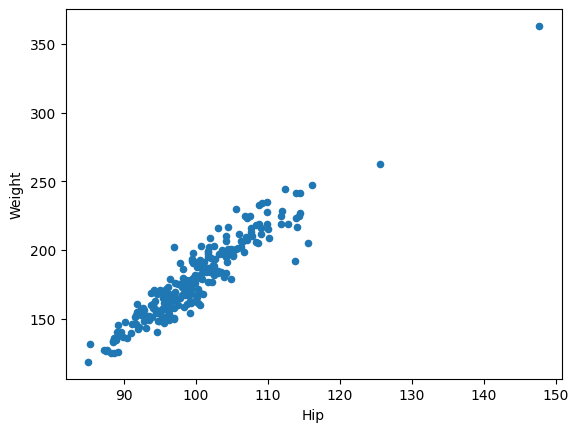

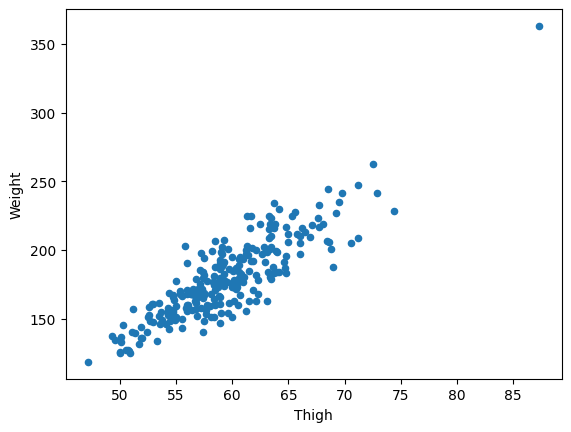

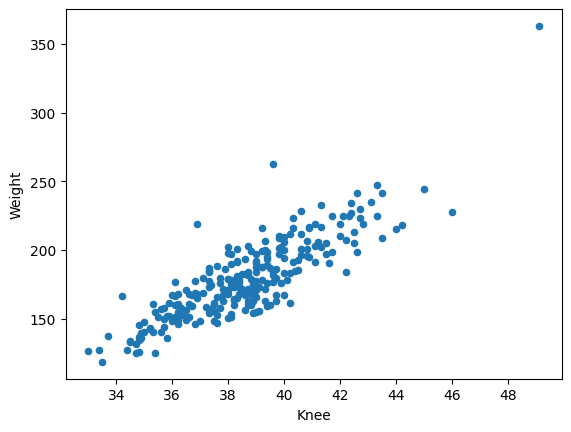

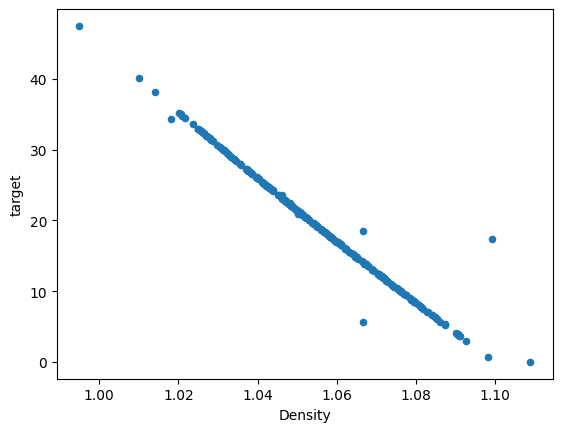

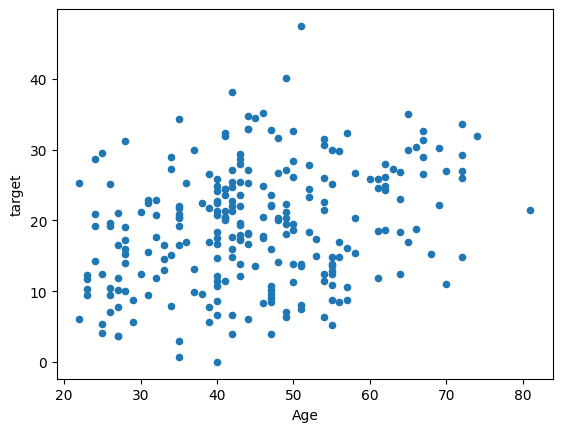

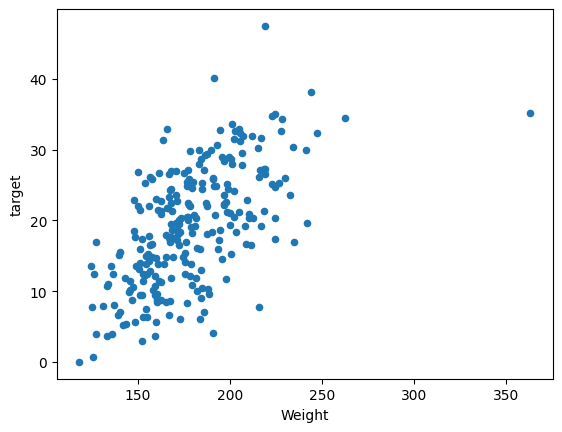

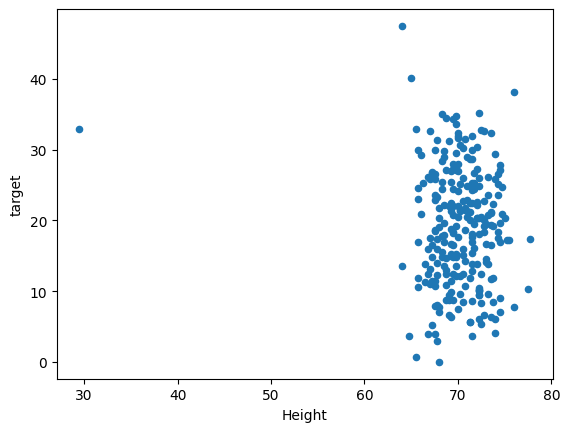

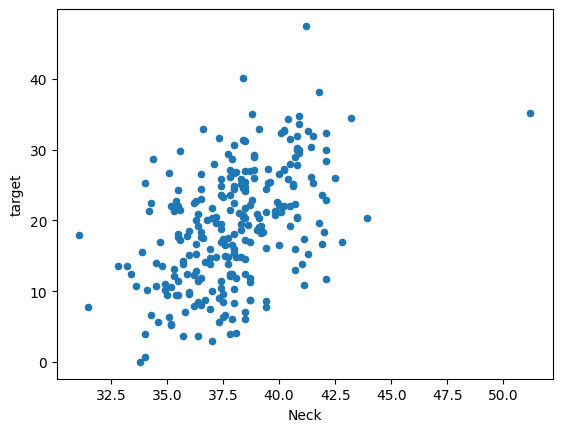

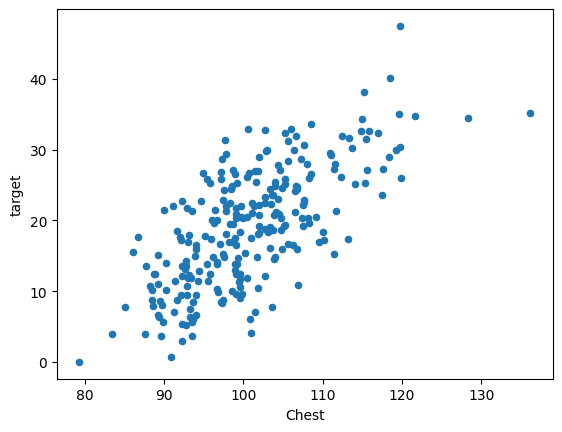

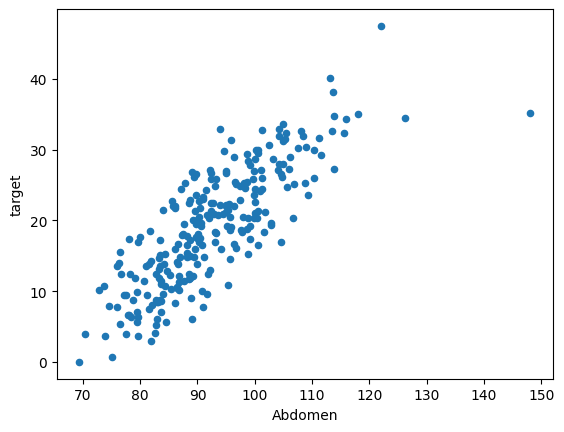

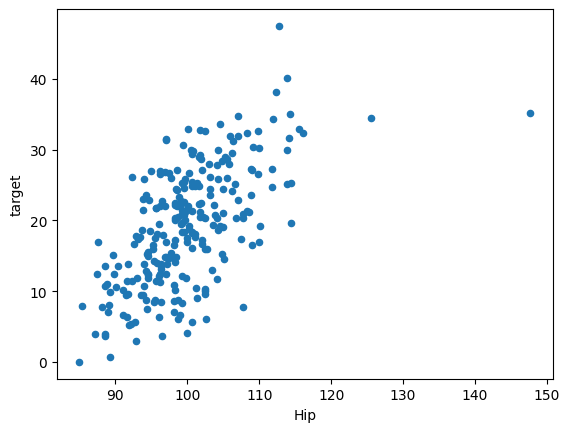

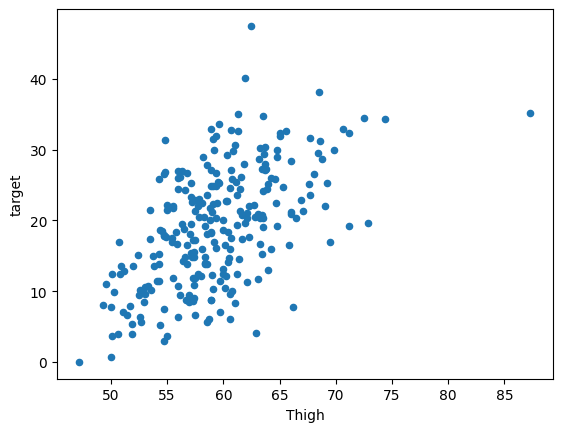

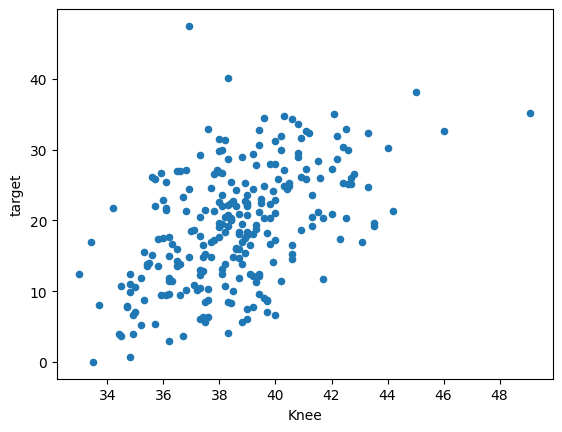

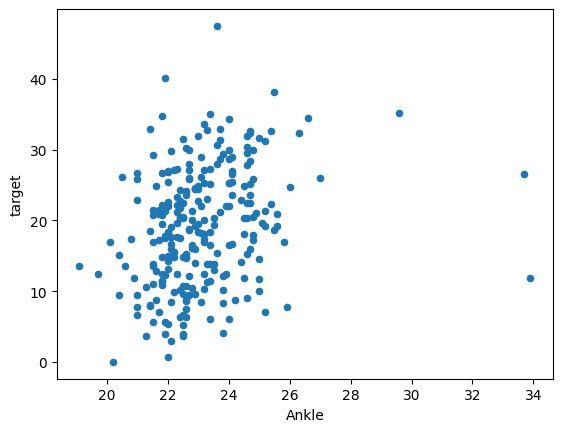

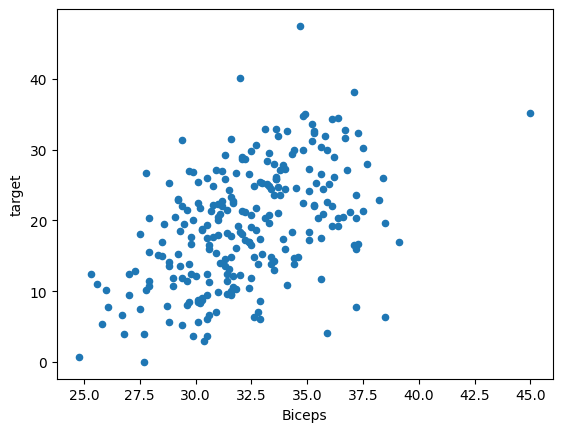

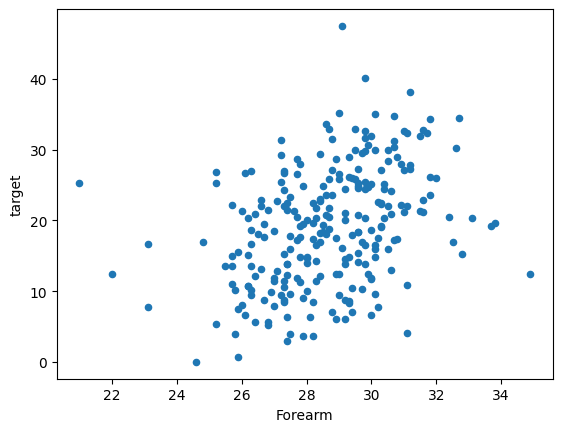

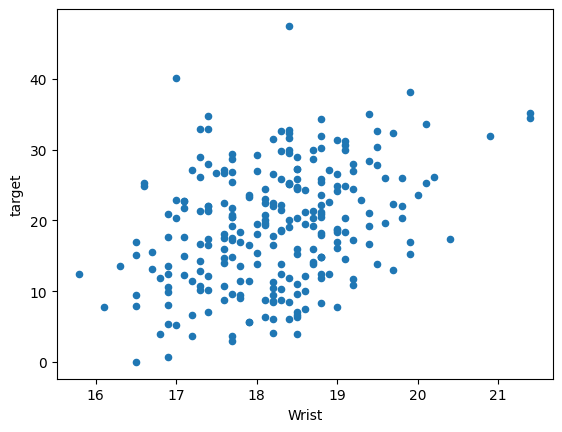

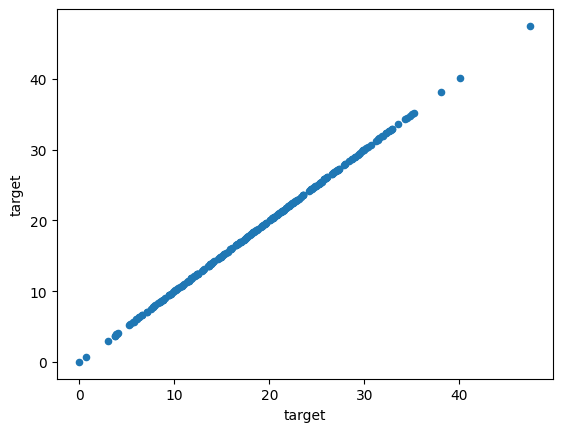

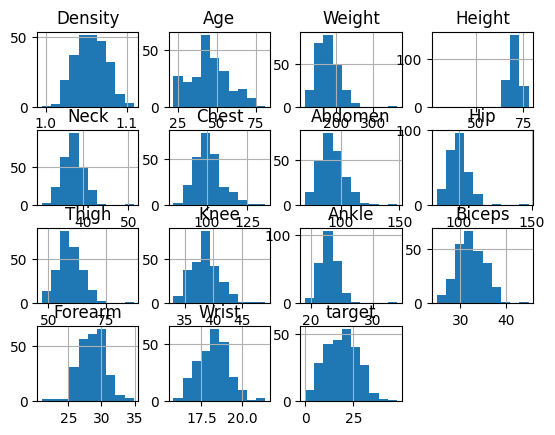

In [7]:
# EDA

display(bf.describe())
for col in cols:
    bf.plot(x=col, y='target', kind='hexbin')

# Input analysis (first 10 columns)
dropped_col = 'Weight'
for col in cols.drop(dropped_col):
    bf.plot(x=col, y=dropped_col, kind='scatter')

# Other column analysis
# for col in cols:
#     bf.plot(x=col, y='insert_col_in_others_here', kind='scatter')

# # Target analysis
for col in cols:
    bf.plot(x=col, y='target', kind='scatter')
for col in others:
    bf.plot(x=col, y='target', kind='scatter')

# Histogram
bf.hist()


<Axes: xlabel='Age', ylabel='target'>

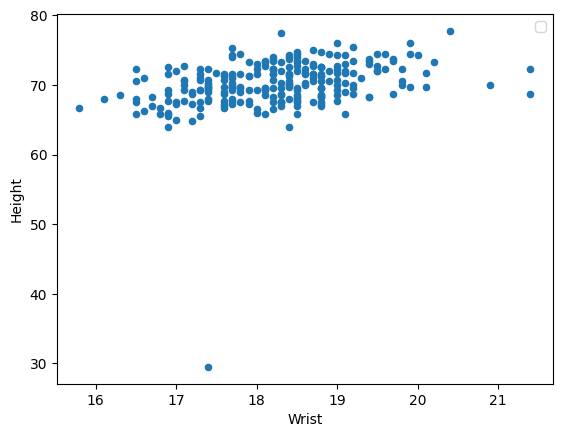

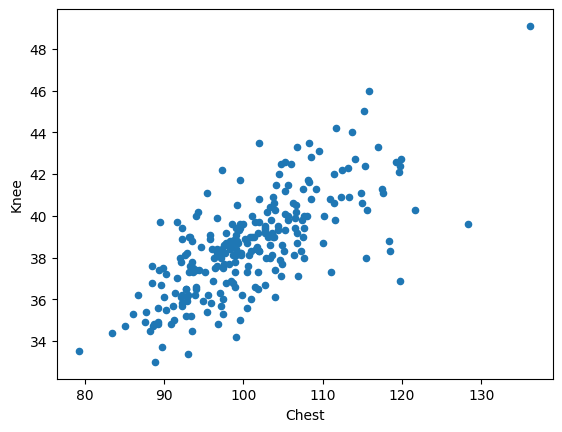

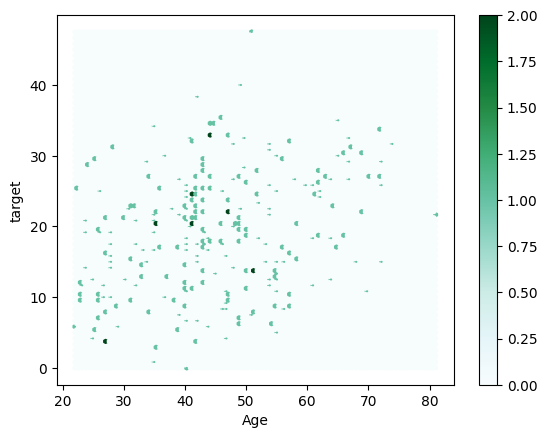

In [ ]:


# Chart 1
bf.plot(x='Wrist', y='Height', kind='scatter', subplots=True)

# Chart 2
bf.plot(x='Chest', y='Knee', kind='scatter')

# Chart 3
bf.plot(x='Age', y='target', kind='hexbin')

Chart 1 is interesting because there is a slight positive relationship between wrist and height, unlike the lack of correlation between height and the other body part variables.

Chart 2 interests me because of the split at Chest > 108, where the points that were clustered together become scattered.

Chart 3 interests me because despite the relationship between target and age seeming to be uncorrelated, the most colored points, if a line of best fit was drawn, depict a positive relationship.

### Correlation

In [ ]:

bf[cols].corr()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee
Density,1.000000,-0.277637,-0.594062,0.097881,-0.472967,-0.682599,-0.798955,-0.609332,-0.553091,-0.495041
Age,-0.277637,1.000000,-0.012746,-0.171645,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516
Weight,-0.594062,-0.012746,1.000000,0.308279,0.830716,0.894190,0.887995,0.940884,0.868694,0.853167
Height,0.097881,-0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053
Neck,-0.472967,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405
Chest,-0.682599,0.176450,0.894190,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496
Abdomen,-0.798955,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179
Hip,-0.609332,-0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473
Thigh,-0.553091,-0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170
Knee,-0.495041,0.017516,0.853167,0.286053,0.672405,0.719496,0.737179,0.823473,0.799170,1.000000


The most correlated pairs are: (Density, target), (Hip, Weight), (Chest, Weight), (Chest, Abdomen), (Hip, Thigh), (Hip, Abdomen), and several other columns with weight.

### Regression Models

In [ ]:

# Model 1
model1 = sklearn.linear_model.PassiveAggressiveRegressor(verbose=False)

# Model 2
model2 = sklearn.linear_model.RANSACRegressor()

# Model 3
model3 = sklearn.linear_model.HuberRegressor()

Passive Aggressive Regressor: [Sklearn Doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveRegressor.html) |
[Explanation](https://amanxai.com/2021/07/04/passive-aggressive-regression-in-machine-learning/)

RANSAC Regressor: [Sklearn Doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html) | [Explanation](https://en.wikipedia.org/wiki/Random_sample_consensus)

Huber Regressor: [Sklearn Doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html) | [Explanation](https://cvxr.rbind.io/cvxr_examples/cvxr_huber-regression/)

### Plotting Target vs. Predictions and Reporting Losses

PassiveAggressiveRegressor(verbose=False) L1 loss is 228.76812093623192.
PassiveAggressiveRegressor(verbose=False) L2 loss is 1392.9564420633935.
RANSACRegressor() L1 loss is 36.33371404125042.
RANSACRegressor() L2 loss is 393.11539273656524.
HuberRegressor() L1 loss is 183.2524052292054.
HuberRegressor() L2 loss is 861.659748227917.


C:\Users\romus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Target')

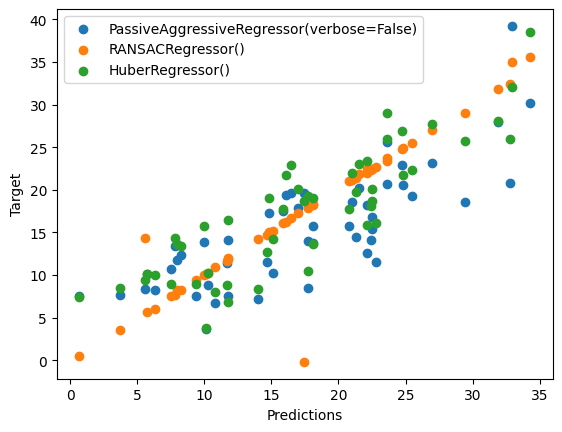

In [ ]:

from sklearn.model_selection import train_test_split
inputs = bf.drop(columns='target')
target = bf.target
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)
models = (model1, model2, model3)
full_set_losses = []
for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    model_L1 = np.sum(np.abs(y_test - predictions))
    model_L2 = np.sum((y_test - predictions)**2)
    print(f'{str(model)} L1 loss is {model_L1}.')
    print(f'{str(model)} L2 loss is {model_L2}.')
    plt.scatter(y_test, predictions)
    full_set_losses.append(model_L2)
plt.legend(models)
plt.xlabel("Predictions")
plt.ylabel("Target")

### 5-Fold Cross-Validation

In [ ]:

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
# Model 1
model1 = sklearn.linear_model.PassiveAggressiveRegressor(verbose=False)

# Model 2
model2 = sklearn.linear_model.RANSACRegressor()

# Model 3
model3 = sklearn.linear_model.HuberRegressor()
models = (model1, model2, model3)

def L2(y_true, y_pred):
    return np.sum((y_true - y_pred) **2)

for m in range(len(models)):
    cv = cross_validate(models[m], inputs, target, cv=5, scoring=make_scorer(L2))
    # print(cv)
    val_L2 = np.mean(cv['test_score'])
    print(f'{str(models[m])} L2 Loss with cross-validation: {val_L2}.')
    print(f'This is {full_set_losses[m] / val_L2} times lower predicted loss.')

PassiveAggressiveRegressor(verbose=False) L2 Loss with cross-validation: 2807.1942708653505.
This is 0.49620949163379363 times lower predicted loss.
RANSACRegressor() L2 Loss with cross-validation: 88.4885436116093.
This is 4.442556931008075 times lower predicted loss.
HuberRegressor() L2 Loss with cross-validation: 1070.232916262847.
This is 0.8051142280661223 times lower predicted loss.


C:\Users\romus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\romus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\romus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_huber.py:343: ConvergenceWarning: lbfgs failed to converg

### Trying Standardization

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

PAR_pipeline = make_pipeline(StandardScaler(), sklearn.linear_model.PassiveAggressiveRegressor(verbose=False))
RANSAC_pipeline = make_pipeline(StandardScaler(), sklearn.linear_model.RANSACRegressor())
Huber_pipeline = make_pipeline(StandardScaler(), sklearn.linear_model.HuberRegressor())
pipelines = (PAR_pipeline, RANSAC_pipeline, Huber_pipeline)
for pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    L2_error = np.sum((y_test - predictions) ** 2)
    print(f'{pipeline.steps[1]} has L2 loss of {L2_error}.')

('passiveaggressiveregressor', PassiveAggressiveRegressor(verbose=False)) has L2 loss of 407.7785111397182.
('ransacregressor', RANSACRegressor()) has L2 loss of 393.115392736566.
('huberregressor', HuberRegressor()) has L2 loss of 388.1853217593796.


The PassiveAggressiveRegressor and HuberRegressor models performed far better in problem 8 than they did in problem 6 in terms of the L2 loss.
However, the RANSACRegressor was about the same.

### Best Model

The best model is the RANSAC Regressor because it has the lowest loss aside from CV, showing that it was unaffected by outliers, unlike the Huber Regressor. In the target vs. predicted values plot, RANSAC is much closer to a straight line than the other two models. In the context of the original data set, this model illustrates a strong correlation between the men's body measurements and an estimate of their percent of body fat.